In [44]:
import numpy as np
import matplotlib.pyplot as plt
import Clustering
from importlib import reload
reload(Clustering)
from Clustering import *
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
from cpclasses import save_plot


# Relaxed Atomic Clusters

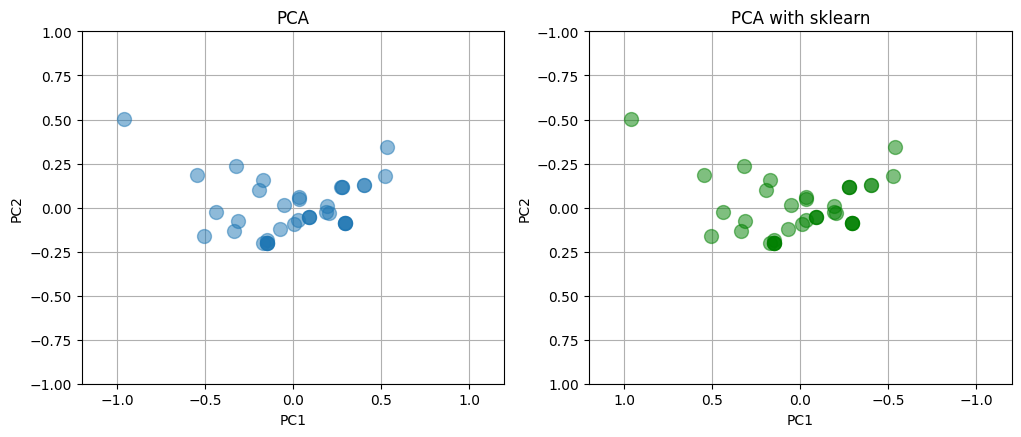

In [45]:


from sklearn.decomposition import PCA as skPCA

coulomb_descriptors = []
for pos in positions:
    Cluster = AtomicCluster(pos, descriptor_methods=[CoulombMatrixSpectrum])
    coulomb_descriptors.append(Cluster.get_descriptor(CoulombMatrixSpectrum))

pca = PCA(n_components=2)
X = np.array(coulomb_descriptors)

X_PCA = pca.transform(X)

fig, axs = plt.subplots(1,2, figsize = (12,5))
pca.draw_descriptor(X_PCA, axs[0])


PCA_sk = skPCA(n_components=2)

X_sk = PCA_sk.fit_transform(X)

axs[1].plot(X_sk[:,0], X_sk[:,1], 'o',alpha = 0.5, ms= 10, color = 'green')
axs[1].set_title('PCA with sklearn')
for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set(xlim = (-1.2,1.2), ylim = (-1,1))

axs[1].invert_yaxis()
axs[1].invert_xaxis()

axs[0].grid()
axs[1].grid()

save_plot(fig, 'PCA;sklearn.png')

# Rattled Atomic Clusters

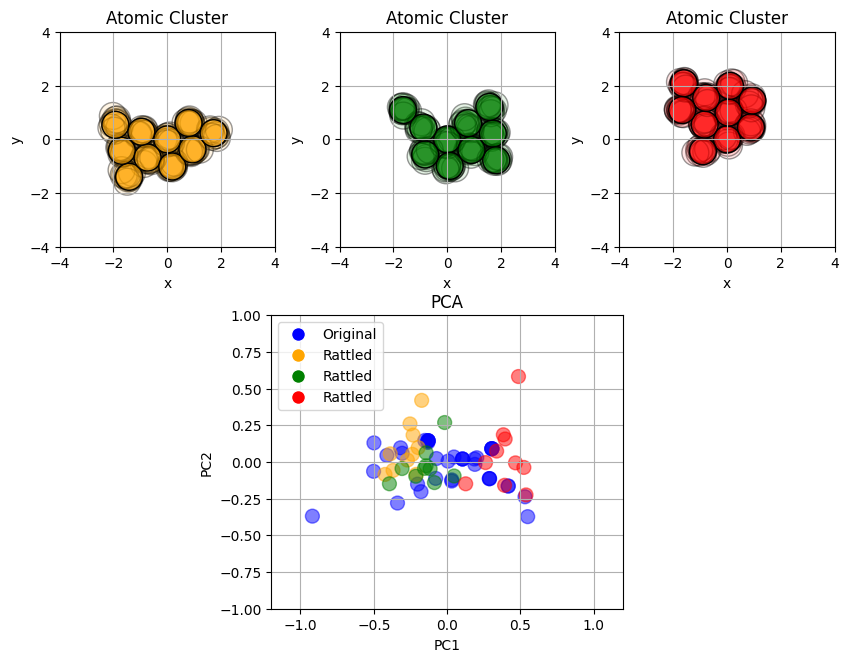

In [48]:

# Add random noise to some clusters

clusters_to_rattle = [0, 4, 6]

colors = ['orange', 'green', 'red']
colors_for_plot = ['blue']*len(X)


rattled_descriptors = []

#Size of the noise
rattle_variance = 0.1


#Loop over the clusters to add noise to them (do it N times per cluster)
fig = plt.figure(figsize=(10, 8))

# Top row with 3 subplots
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=3)

fig.subplots_adjust(hspace=0.1, wspace=0.3)

axs = [ax1, ax2, ax3]

N = 10
for rattle, color, ax in zip(clusters_to_rattle, colors, axs):
    
    for i in range(N):
        position = positions[rattle] + np.random.normal(0, rattle_variance, positions[rattle].shape)
        Cluster = AtomicCluster(position, descriptor_methods=[CoulombMatrixSpectrum])
        rattled_descriptors.append(Cluster.get_descriptor(CoulombMatrixSpectrum))
        colors_for_plot.append(color)
        Cluster.draw(ax, set_color=color, alpha=0.1, alpha_edge = 0.4)

    cluster = AtomicCluster(positions[rattle], descriptor_methods=[CoulombMatrixSpectrum])
    ax.grid()
    cluster.draw(ax, set_color=color)
    ax.set(xlabel='x', ylabel='y')
    





# Bottom row with 1 subplot spanning the width



X_new = np.array(coulomb_descriptors + rattled_descriptors)
X_new_PCA = pca.transform(X_new)


#Plot the new data with a new color for the rattled clusters
ax4.scatter(X_new_PCA[:,0], X_new_PCA[:,1], color = colors_for_plot, alpha = 0.5, s = 100)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Original', markerfacecolor='b', markersize=10)
]

for color in colors:
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Rattled', markerfacecolor=color, markersize=10))
# Add the custom legend to the plot



ax4.set_title('PCA')

ax4.set_aspect('equal')
ax4.set_xlabel('PC1')
ax4.set_ylabel('PC2')
ax4.set(xlim = (-1.2,1.2), ylim = (-1,1))
ax4.legend(handles=legend_elements, loc='upper left')
ax4.grid()


save_plot(fig, 'PCA_rattled.png', bbox_inches='tight')

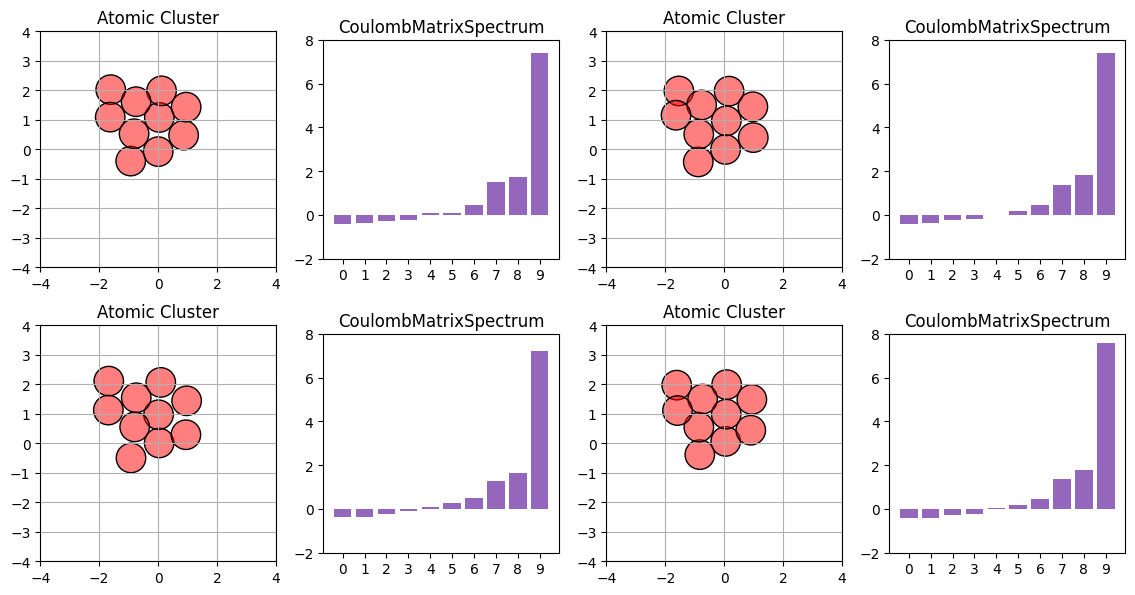

In [85]:
fig, axs = plt.subplots(2,4, figsize = (14,7))

axs = axs.flatten()

rattle_variance = 0.05
for ax1, ax2 in zip(axs[::2], axs[1::2]):
    position = positions[rattle] + np.random.normal(0, rattle_variance, positions[rattle].shape)
    cluster = AtomicCluster(position, descriptor_methods=CoulombMatrixSpectrum)
    ax1.grid()
    cluster.draw(ax1, set_color=color)
    print(cluster.descriptor_methods)
    cluster.draw_descriptor(ax2)
    #ax1.set(xlabel='x', ylabel='y')
    ax2.set_aspect('equal')

save_plot(fig, 'rattled_clusters, Coulomb.png', bbox_inches='tight')